# Robolavo

Use o bot treinado com os tweets do [Olavo de Carvalho](http://www.twitter.com/opropriolavo) para completar textos.

In [2]:
from fastai.text import *

In [3]:
#ajustando os caminhos que serão utilizados

datapath = Path('../data')
modelspath = Path('../models')
path = Path('../')
best_model_path = Path('../models/bestmodel30k')

In [ ]:
# Download do modelo em portugues pretreinado na wikipedia
!curl https://storage.googleapis.com/gde-dl-bsb/models/bestmodel30k.pth -o ../models/bestmodel30k.pth
# Download do vocabulário
!curl https://storage.googleapis.com/gde-dl-bsb/models/itos.pkl -o ../models/itos.pkl

In [5]:
tweets = 'RNNdata/opropriolavo_tweets.txt'
def readnums(d): return [' '.join(o.strip() for o in open(d).readlines())]
#readnums(tweets)
t = readnums(tweets)
train_txt = valid_txt = []
print(len(t[0]))

257316


In [5]:
tweets = 'RNNdata/blog_olavo.txt'
def readnums(d): return [' '.join(o.strip() for o in open(d).readlines())]
#readnums(tweets)
t = readnums(tweets)
train_txt = valid_txt = []
print(len(t[0]))

4624335


In [6]:
x = len(t[0]) - len(t[0])//5 
train_txt.append(t[0][:x])
valid_txt.append(t[0][x:])

In [7]:
bs = 64
#path = 'RNNdata'

train = TextList(list(train_txt), path=path); print(type(train))
valid = TextList(list(valid_txt), path=path); print(type(valid_txt))

src = ItemLists(path=path, train=train, valid=valid).label_for_lm()
data = src.databunch(bs=bs)

In [8]:
#for i in range(80): print(train[i].text)
train[0].text[:80]

'xxbos xxmaj enquanto os liberais e conservadores continuarem fingindo para si pr'

In [9]:
len(data.valid_ds[0][0].data)

723289

In [10]:
data.bptt, len(data.valid_dl)

(70, 202)

In [11]:
13017/70/bs

2.905580357142857

In [12]:
it = iter(data.valid_dl)
x1,y1 = next(it)
x2,y2 = next(it)
x3,y3 = next(it)
it.close()

In [12]:
x1.numel()+x2.numel()+x3.numel()

13440

In [13]:
data = src.databunch(bs=bs, bptt=3)

In [14]:
x,y = data.one_batch()
x.shape,y.shape

(torch.Size([64, 3]), torch.Size([64, 3]))

In [8]:
tokenizer = Tokenizer(lang='pt', n_cpus=8)
#vocabulario
with modelspath.joinpath('itos.pkl').open('rb') as f:
    itos = pickle.load(f)
vocab = Vocab(itos)


In [9]:
learn = language_model_learner(data, arch=AWD_LSTM, pretrained_fnames=(best_model_path,modelspath.joinpath('itos')))

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


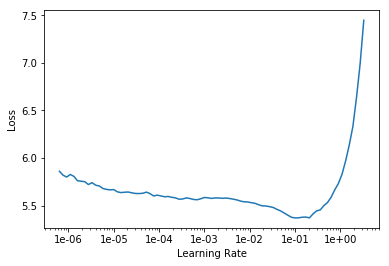

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.163058,3.686453,0.272199,00:06
1,3.689177,3.192287,0.313083,00:05
2,3.559790,2.944528,0.338797,00:05
3,3.193336,2.813564,0.354494,00:05
4,3.119943,2.817264,0.351963,00:05


In [16]:
learn.save('first-olavobot')

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.934301,2.672404,0.376402,00:10
1,2.855417,2.475164,0.409237,00:10
2,2.923917,2.301761,0.450903,00:10
3,2.705880,2.038522,0.505846,00:10
4,2.517094,1.815398,0.558494,00:10
5,2.319556,1.617653,0.604877,00:10
6,2.155465,1.465588,0.642756,00:10
7,1.889382,1.361011,0.663862,00:10
8,1.823977,1.323462,0.676155,00:10
9,1.933501,1.318403,0.676355,00:10


In [20]:
TEXT = "Brasil acima de toods, Deus acima de tudo"
N_WORDS = 50
N_SENTENCES = 5

In [21]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Brasil acima de toods, Deus acima de tudo o que a mídia comunopetista e os universidades brasileiros podem fazer . o Mourão é a glória da vida . Não sou uma glória . No Brasil , só é importante . Quando o Bolsonaro me disse que o Mourão era o "
Brasil acima de toods, Deus acima de tudo , é menos desprezíveis que a mídia . Em Washington o filme " The Forma " , do qual o presidente Bolsonaro disse ter dito : " Quem entrar em " Olavo de Carvalho , o Olavo de Carvalho "
Brasil acima de toods, Deus acima de tudo , Deus é o que , de novo , é tudo o que o Brasil diz . Da página do Aidemim : No Brasil , o povão já é um PRATICAMENTE NORMAL . Você é um gênio e um gênio .
Brasil acima de toods, Deus acima de tudo quanto os ideologias estão fazendo uma só . " No Brasil , o senso moral da matança falante é de , mas na Rússia , na Rússia , na Rússia e na China . Tudo isto é propaganda fascista , a vontade popular
Brasil acima de toods, Deus acima de tudo está somente o que não sabe o que se passa . 

In [22]:
TEXT = "O cu"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.50) for _ in range(N_SENTENCES)))

O cu da Marielle . Nunca vi um general brasileiro que nunca se interessou por essa luta de décadas que eu tenha feito contra mim . Não é preciso disputar espaço com a Montfaible . Só o que você diz é que eu tenha objetivos mais ...
O cu , e o cu cheio de merda . o Paulo Roberto de Almeida é um gênio , e não faz isso . Não sei . Como posso , não é bosta nenhuma . Não tenho a menor idéia do que é um escritor .
O cu do Olavo de Carvalho , foi ele que me deu o cu para ter um governo pró - comunista internacional . Não é um agente político , e sou um agente político . é foda . é foda . é foda . é foda . é foda
O cu do Olavo de Carvalho , mas ele não tem a idéia de que ele tem a sua vida física . Esse pessoal da mídia , Marco Vil , é apenas um bobão metido . Não posso conversar com ele sobre a minha filosofia ,
O cu do Olavo . Tudo o que o Olavo diz é tudo para o Olavo . Tudo o que o Olavo diz é verdade . Não sei se o Olavo de Carvalho , o Olavo de Carvalho , o


In [23]:
TEXT = "A manifestação"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.50) for _ in range(N_SENTENCES)))

A manifestação do Lula , como já ensinava o Mourão : Eu sempre disse que o Brasil foi o último país onde o Bolsonaro teve a sua maior força política organizada . o que eu sempre disse de mim é PURA FANTASIA . Se
A manifestação . Se fosse mesmo um experimento , me respondem com o QI acima da 12 . Não me dizer que o Brasil é um país onde o comunismo é a gravidade . Mas é uma mente que não tem NADA a ver com jornalismo
A manifestação do Brasil . Os generais estão tão ... Se eu fosse realmente o guru da direita , ele nunca se interessou por uma luta de décadas que nunca foi . Nunca ouvi uma ou duas mensagens sem resposta . Dizer que o Olavo de
A manifestação de um amigo . Um amigo que não entende isso é um CHARLATÃO . o Santos Cruz e os EUA são os líderes da massa humana . As Forças Armadas JAMAIS libertaram o país do comunismo . Mas , se
A manifestação . Não posso conversar com oficiais semi - analfabetos que não sabem de como eles são os mesmos que ao longo de vinte anos . Se você dá a v

In [24]:
TEXT = "O Olavo"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.50) for _ in range(N_SENTENCES)))

O Olavo de Carvalho , o qual não foi eleito para governar o país , mas o Mourão foi o gostosão que os estava ... Não tenho mais nada a ver com o assunto do que com os brasileiros . o Mourão jamais me deve desculpas por ter
O Olavo de Carvalho . a última vez que o Olavo de Carvalho foi a ele , no dia em que ele veio , foi a sua casa , em Nova Era , para fazer um discurso sobre o filósofo de Carvalho , o tal
O Olavo de Carvalho : Os filhos da puta são de uma puta que tenha sido eleito presidente da República , ou seja , uma democracia . Os que estão na mídia ou na dentro da mídia nacional são INCAPAZES de imaginar que alguém tenha objetivos mais
O Olavo de Carvalho , que não sabe escrever , que não domina . Como é possível ? Não sei se a Fôia , por exemplo , não tem PORRA NENHUMA do que a Fôia fará , mas a Fôia , por exemplo ,
O Olavo , e com a ajuda dos seus cocôs , o Olavo , o Olavo . o Olavo , segundo a Fôia , é um herói , um inimigo do Olavo de Carvalho . Nunca vi um general brasilei

In [25]:
TEXT = "A Terra é"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.50) for _ in range(N_SENTENCES)))

A Terra é plana . Só uma opinião minha sobre a água plana é que o autor tem de ser imediatamente exonerado . o Eduardo Bolsonaro é um homem relativamente culto , relativamente inteligente e relativamente inteligente . Não tem uma personalidade humana . é um agente político .
A Terra é plana . Não vale a pena de ser normal . Só pessoas para as quais um emprego público é a meta e não uma . Como é possível que a humanidade não lhe disse nada , não é preciso NADA . Se eu fosse um
A Terra é plana . Se o Bolsonaro quer agradar a mídia e os membros do governo , NÃO QUERO ? o Bolsonaro é um imbecil louco , mas não um INIMIGO DA PÁTRIA . Só conhece dez mil pessoas que viraram funcionários do
A Terra é plana . Quando a Lava Jato ACABOU -- Jato da Educação -- entra no MEC , o Coronel Roquetti , mais bonzinho e mais bonzinho , começa a se meter com o Olavo . Roquetti então começa a afastar
A Terra é plana . Só pensa dia e noite que a Fôia e a Fôia são a base da " História das Idéias Politicas " . 

In [26]:
TEXT = "A homossexualidade"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.50) for _ in range(N_SENTENCES)))

A homossexualidade . o Bundadelli jura que até ontem ninguém no Brasil me conhecia , só o Pondé . Vocês acham que isso é fácil ? Se alguém ainda não percebeu que o Pondé é louco demais para entender que está acima do Bolsonaro ,
A homossexualidade , os generais ... Só me respondem com a conversa do Lula . Não me respondem com a UM EXPERIMENTO . Se há centenas de idiotas exigindo que os generais tivessem UM PINGO de razão e de razão , os meus inimigos
A homossexualidade e a ... Por favor , se os militares brasileiros tivessem a coragem de defendê - lo contra o Bolsonaro , eles teriam de tirar proveito do atual presidente da República : Vocês imaginam que o Mourão é o Mourão . Só pensa
A homossexualidade de ser um escritor , e eu não disse nada a meu respeito . Só o Mastim Vaca escreve como o personagem do Olavo de Carvalho . a última parte da minha filosofia é a de um político brasileiro . Nunca vi uma coisa
A homossexualidade , o Brasil é o país onde o mais inteligente das ideologias s

In [27]:
learn.save('Olavobot-segundo')

In [10]:
learn.load('Olavobot-segundo')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (2 items)
x: LMTextList
xxbos xxmaj xxunk novamente cada general : xxunk que você , por defender em público a honra das xxmaj forças xxmaj armadas , xxunk mais ameaças de morte ou xxunk mais xxunk sociais e xxunk do que eu , e xxunk que o grande amigo delas é você e não eu . a xxmaj xxunk xxmaj xxunk xxunk em " viver sem xxunk " . o xxmaj lula xxunk esse sonho . xxmaj faça ele o que xxunk , sua incapacidade de sentir culpa é total e invencível . xxmaj nos anos 60 - 70 do século passado xxunk a xxunk da classe jornalística num xxup poder xxup político xxup xxunk e xxup organizado sob a direção do xxmaj partido xxmaj comunista . xxmaj hoje vejo , com horror , as xxunk desse processo , cuja existência xxup xxunk à percepção dos nossos xxunk . xxmaj só duas coisas xxunk à direita para ser xxunk por décadas e décadas : ( 1 ) coragem ; ( 2 ) xxunk os xxunk , traidores e xxunk . xxmaj urgente : xxmaj só xxunk é xxunk , xxunk . xxmaj só x

In [11]:
TEXT = "A Terra é"
N_WORDS = 80
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.5) for _ in range(N_SENTENCES)))

A Terra é plana . é uma afirmação minha . Por que fui a glória da glória suprema do Brasil ? Quando o Mourão me viu , Mourão me viu . Tudo o que fiz contra mim foi o cu da Marielle . Puta que pariu . Puta que pariu . Puta que pariu . Puta que pariu . Puta que pariu . Puta que pariu . Puta que
A Terra é plana . Não sei quantas crianças , e de repente vem o Bolsonaro , só podem ser opiniões de grupos e de jornalistas . Não estou com a História da Inteligência Brasileira , nem com as universidades , nem com as universidades , que sabem sentir o que é uma opinião . Quando eu disse que o Brasil é louco demais para ser normal , nenhum olavette saiu do governo , e
A Terra é plana . Se é mesmo que a água plana se livre de água , se for a água plana , ainda há mais coisas entre ele e a água que a água plana . Só a água plana pode ser invisível . Quando a água se explica , o sujeito chega a uma síntese inicial confusa e muito menos a ele ele acha que ele tem a idéia mais importante da minha filo

In [12]:
TEXT = "Em breve só teremos:"
N_WORDS = 80
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.5) for _ in range(N_SENTENCES)))

Em breve só teremos: Se o Bolsonaro quer agradar à mídia , o show business e a universidade são as mesmas ? Não confio em mais nenhum membro do governo , nem o que se diz é que eu tenha objetivos mais ... o pessoal do Bolsonaro , parece que o pessoal da mídia está " se " de todos os eleitores . Qualquer um que se tenha fala sobre o presidente antes de ter sequer o mínimo de
Em breve só teremos: o que é verdade é que a mídia fez muito ruído em torno da minha afirmação de que " o governo não durará seis meses " , dando a isso , mentirosamente , mentirosamente , o sentido de uma hostilidade minha ao presidente Bolsonaro . Em tempo , é preciso avisar : a mídia fez muito ruído em torno da minha afirmação de que " o governo não durará seis meses " , dando a isso , mentirosamente
Em breve só teremos: Se o Bolsonaro , por que o presidente se acha superior a ideologias , é o gostosão mais elementar que já se viu no mundo . Se o povo quer dar dinheiro público aos inimigos do presidente , o Mourã